<a href="https://colab.research.google.com/github/Chandravardhan02/Customer_churn_prediction/blob/main/Churn_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
   CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0           1    Male              0      No         No      51           No   
1           2  Female              0      No        Yes      47           No   
2           3    Male              0      No        Yes       4           No   
3           4    Male              1      No        Yes       7          Yes   
4           5    Male              0     Yes         No      35           No   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service             DSL                  Yes  ...   
1                No              No                  Yes  ...   
2                No             DSL  No internet service  ...   
3                No              No                  Yes  ...   
4                No     Fiber optic                   No  ...   

      DeviceProtection TechSupport          StreamingTV      StreamingMovies  \
0  No internet service         Yes

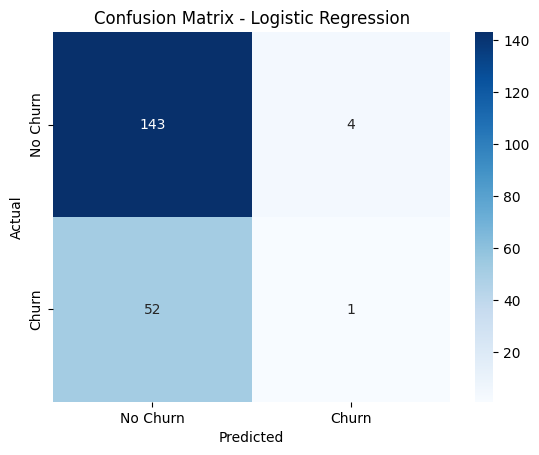


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.73      0.97      0.84       147
           1       0.20      0.02      0.03        53

    accuracy                           0.72       200
   macro avg       0.47      0.50      0.44       200
weighted avg       0.59      0.72      0.62       200


--- Training Random Forest Classifier ---

Random Forest Classifier Performance:
Accuracy: 0.7400
Precision: 0.6667
Recall: 0.0377
F1-Score: 0.0714
ROC AUC Score: 0.4505

Confusion Matrix (Random Forest):


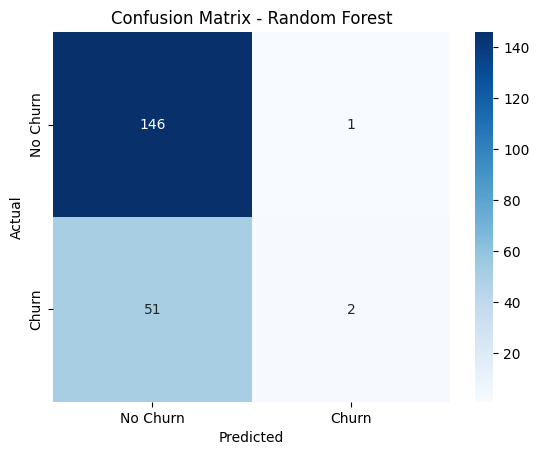


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       147
           1       0.67      0.04      0.07        53

    accuracy                           0.74       200
   macro avg       0.70      0.52      0.46       200
weighted avg       0.72      0.74      0.64       200


--- Training Gradient Boosting Classifier ---

Gradient Boosting Classifier Performance:
Accuracy: 0.6700
Precision: 0.2593
Recall: 0.1321
F1-Score: 0.1750
ROC AUC Score: 0.3726

Confusion Matrix (Gradient Boosting):


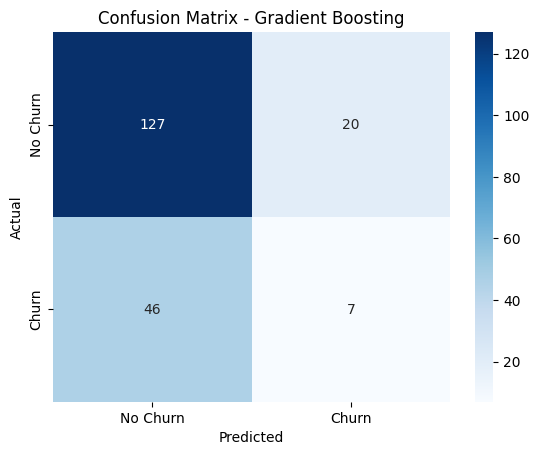


Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       147
           1       0.26      0.13      0.17        53

    accuracy                           0.67       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.61      0.67      0.63       200


--- Feature Importance (Random Forest) ---
                               Feature  Importance
3                         TotalCharges    0.103509
2                       MonthlyCharges    0.100152
1                               Tenure    0.096227
37                   Contract_One year    0.020906
19  OnlineSecurity_No internet service    0.019761
12                    MultipleLines_No    0.019380
39                 PaperlessBilling_No    0.019273
18                   OnlineSecurity_No    0.018796
24                 DeviceProtection_No    0.018419
28     TechSupport_No internet service    0.018418


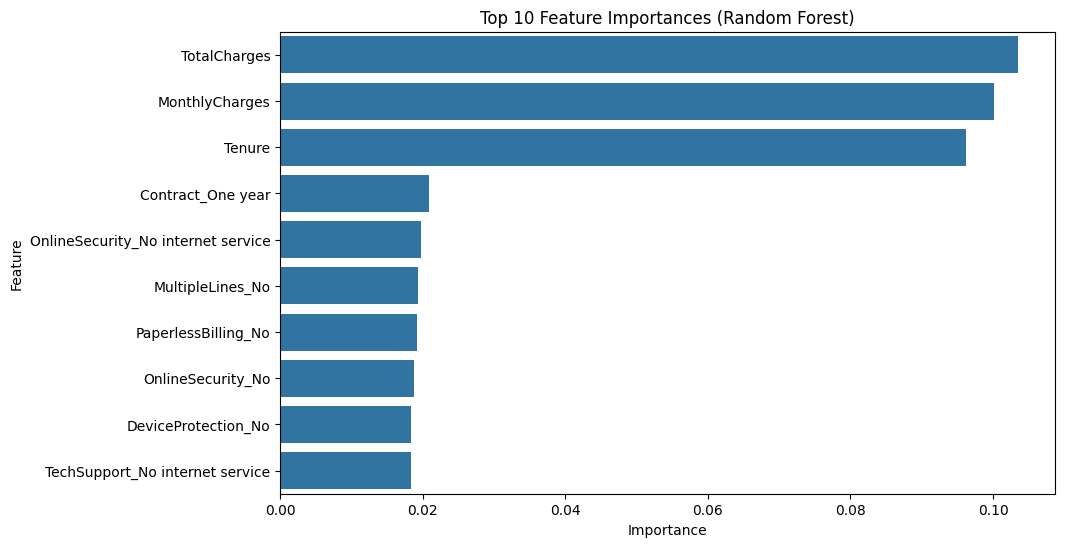


--- Example Prediction on New Data ---

Probability of Churn for new customer: 0.1300
Predicted Churn for new customer: No


In [1]:
"""
In this it Generates synthetic customer data, preprocesses it, trains multiple classifiers,
and evaluates their performance, and identify whether the customer churn or not.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings

warnings.filterwarnings('ignore')

def main():
    # Synthetic Data Generation
    np.random.seed(42)
    num_customers = 1000

    data = {
        'CustomerID': range(1, num_customers + 1),
        'Gender': np.random.choice(['Male', 'Female'], num_customers),
        'SeniorCitizen': np.random.choice([0, 1], num_customers, p=[0.8, 0.2]),
        'Partner': np.random.choice(['Yes', 'No'], num_customers),
        'Dependents': np.random.choice(['Yes', 'No'], num_customers),
        'Tenure': np.random.randint(1, 72, num_customers),
        'PhoneService': np.random.choice(['Yes', 'No'], num_customers),
        'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], num_customers),
        'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], num_customers),
        'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], num_customers),
        'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], num_customers),
        'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], num_customers),
        'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], num_customers),
        'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], num_customers),
        'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], num_customers),
        'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], num_customers),
        'PaperlessBilling': np.random.choice(['Yes', 'No'], num_customers),
        'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], num_customers),
        'MonthlyCharges': np.random.uniform(20, 120, num_customers).round(2),
        'TotalCharges': np.random.uniform(20, 5000, num_customers).round(2),
        'Churn': np.random.choice(['Yes', 'No'], num_customers, p=[0.25, 0.75])
    }

    df = pd.DataFrame(data)

    missing_indices = np.random.choice(df.index, 20, replace=False)
    df.loc[missing_indices, 'TotalCharges'] = np.nan

    print("Dataset Head:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Data Preprocessing
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    # Splitting Data
    X = df.drop(['CustomerID', 'Churn'], axis=1)
    y = df['Churn']

    categorical_features = X.select_dtypes(include='object').columns.tolist()
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    print("\nCategorical Features for ColumnTransformer:", categorical_features)
    print("Numerical Features for ColumnTransformer:", numerical_features)

    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"\nX_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

    # Model Training - Logistic Regression
    print("\n--- Training Logistic Regression Model ---")
    lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

    lr_pipeline.fit(X_train, y_train)
    y_pred_lr = lr_pipeline.predict(X_test)
    y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]

    # Model Evaluation - Logistic Regression
    print("\nLogistic Regression Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_lr):.4f}")

    print("\nConfusion Matrix (Logistic Regression):")
    sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Logistic Regression')
    plt.show()

    print("\nClassification Report (Logistic Regression):")
    print(classification_report(y_test, y_pred_lr))

    # Model Training - Random Forest Classifier
    print("\n--- Training Random Forest Classifier ---")
    rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

    rf_pipeline.fit(X_train, y_train)
    y_pred_rf = rf_pipeline.predict(X_test)
    y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

    # Model Evaluation - Random Forest Classifier
    print("\nRandom Forest Classifier Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_rf):.4f}")

    print("\nConfusion Matrix (Random Forest):")
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Random Forest')
    plt.show()

    print("\nClassification Report (Random Forest):")
    print(classification_report(y_test, y_pred_rf))

    # Model Training - Gradient Boosting Classifier
    print("\n--- Training Gradient Boosting Classifier ---")
    gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))])

    gb_pipeline.fit(X_train, y_train)
    y_pred_gb = gb_pipeline.predict(X_test)
    y_prob_gb = gb_pipeline.predict_proba(X_test)[:, 1]

    # Model Evaluation - Gradient Boosting Classifier
    print("\nGradient Boosting Classifier Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_gb):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_gb):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_gb):.4f}")

    print("\nConfusion Matrix (Gradient Boosting):")
    sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Gradient Boosting')
    plt.show()

    print("\nClassification Report (Gradient Boosting):")
    print(classification_report(y_test, y_pred_gb))

    # Feature Importance (Random Forest)
    if hasattr(rf_pipeline.named_steps['classifier'], 'feature_importances_'):
        print("\n--- Feature Importance (Random Forest) ---")
        ohe_features = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
        all_features = numerical_features + list(ohe_features)
        importances = rf_pipeline.named_steps['classifier'].feature_importances_
        feature_importances_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
        feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
        print(feature_importances_df.head(10))
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
        plt.title('Top 10 Feature Importances (Random Forest)')
        plt.show()

    print("\n--- Example Prediction on New Data ---")
    new_customer_data = pd.DataFrame({
        'Gender': ['Male'],
        'SeniorCitizen': [0],
        'Partner': ['Yes'],
        'Dependents': ['No'],
        'Tenure': [24],
        'PhoneService': ['Yes'],
        'MultipleLines': ['No'],
        'InternetService': ['Fiber optic'],
        'OnlineSecurity': ['No'],
        'OnlineBackup': ['No'],
        'DeviceProtection': ['Yes'],
        'TechSupport': ['No'],
        'StreamingTV': ['Yes'],
        'StreamingMovies': ['Yes'],
        'Contract': ['Month-to-month'],
        'PaperlessBilling': ['Yes'],
        'PaymentMethod': ['Electronic check'],
        'MonthlyCharges': [85.50],
        'TotalCharges': [2000.00]
    })
    new_customer_pred_proba = rf_pipeline.predict_proba(new_customer_data)[:, 1]
    new_customer_pred = rf_pipeline.predict(new_customer_data)
    print(f"\nProbability of Churn for new customer: {new_customer_pred_proba[0]:.4f}")
    print(f"Predicted Churn for new customer: {'Yes' if new_customer_pred[0] == 1 else 'No'}")

if __name__ == "__main__":
    main()